In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# set seed for reproducibility
np.random.seed(0)



In [2]:
# Single server queue simulation
l = 1 # average number of arrivals per hour
µ = 1.5 # average number of people served per hour
ncust = 1000 # number of customers
c = 1 # number of servers
utilization={}    
service_times = [] # list of service times once they reach the front

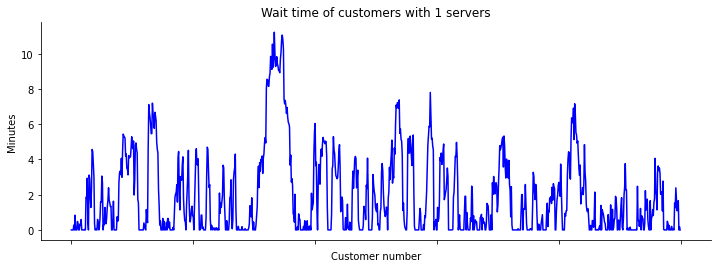

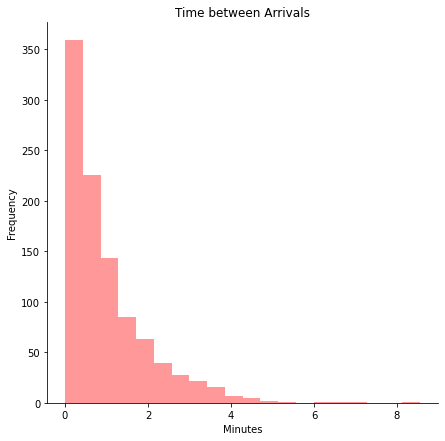

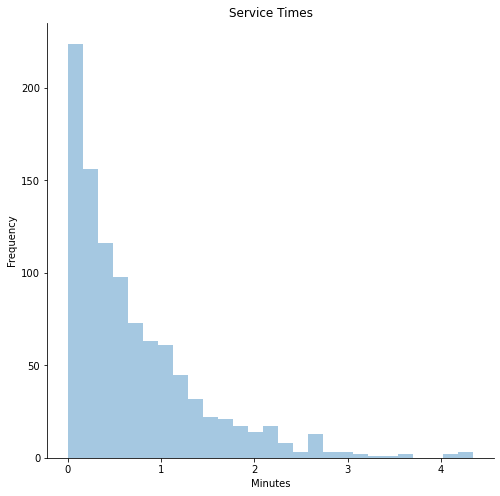

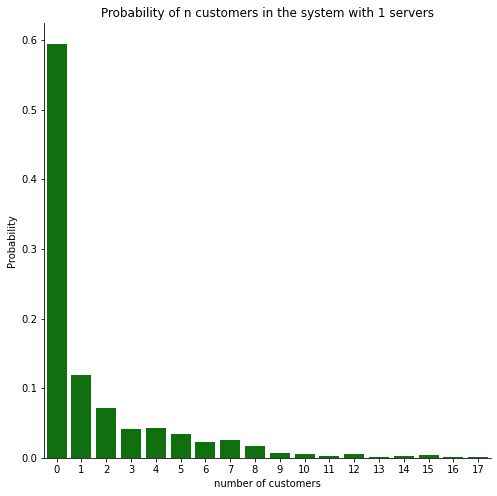

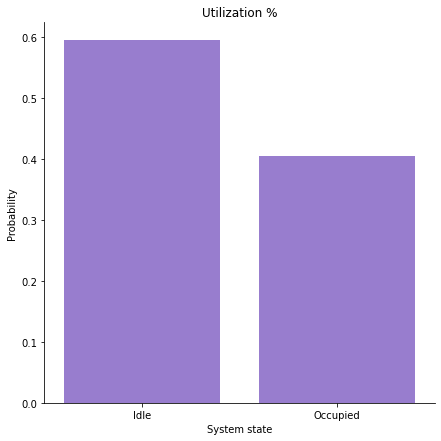

Output: 
 Servers: 1 
Time Between Arrivals :  1.003540208760709 
 Service Time: (1/µ) 0.7107006852820134 
 Utilization (c):  0.4053280567972184 
 Expected wait time in line (Wq): 1.9202734000000001 
 Expected time spent on the system (Ws): 2.6309737999999996 
 Expected number of customers in line (Lq): 1.144226792753855 
 Expected number of clients in the system (Ls): 1.5495548495510734 
 


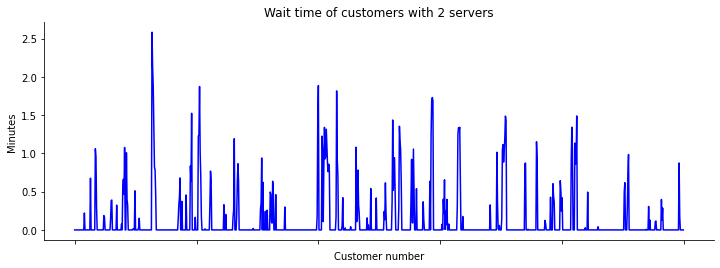

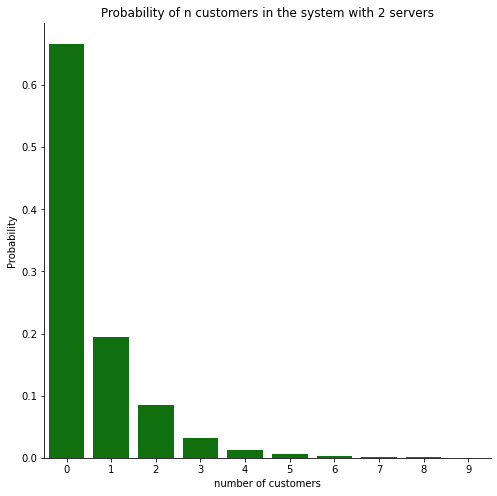

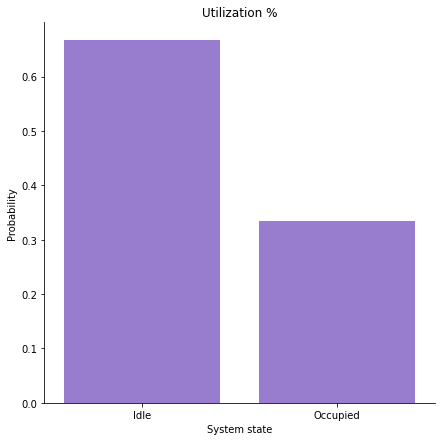

Output: 
 Servers: 2 
Time Between Arrivals :  1.003540208760709 
 Service Time: (1/µ) 0.7107006852820134 
 Utilization (c):  0.20910350602872063 
 Expected wait time in line (Wq): 0.1290735 
 Expected time spent on the system (Ws): 0.8397739000000001 
 Expected number of customers in line (Lq): 0.14995005793359403 
 Expected number of clients in the system (Ls): 0.5681570699910353 
 


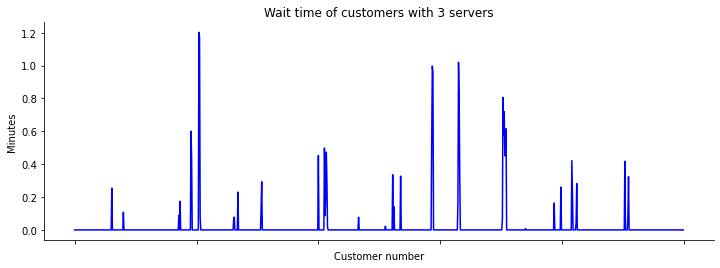

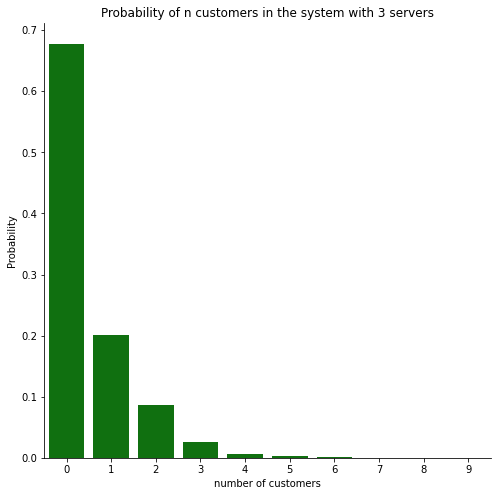

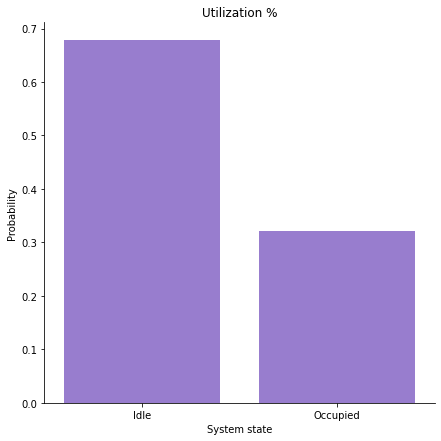

Output: 
 Servers: 3 
Time Between Arrivals :  1.003540208760709 
 Service Time: (1/µ) 0.7107006852820134 
 Utilization (c):  0.15297674113335663 
 Expected wait time in line (Wq): 0.018622800000000002 
 Expected time spent on the system (Ws): 0.7293232000000001 
 Expected number of customers in line (Lq): 0.03447497256773565 
 Expected number of clients in the system (Ls): 0.4934051959678055 
 


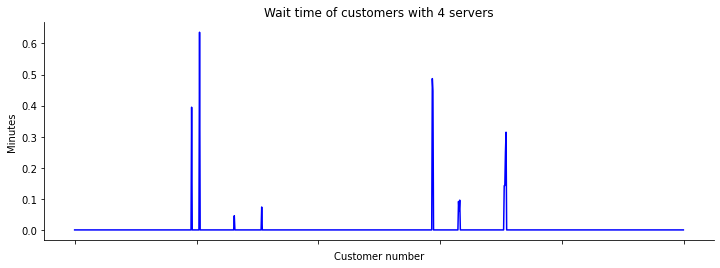

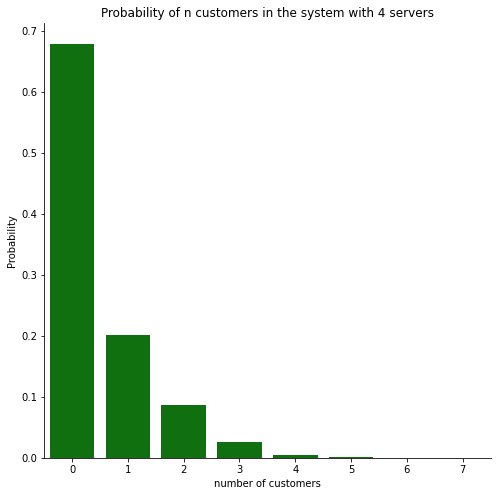

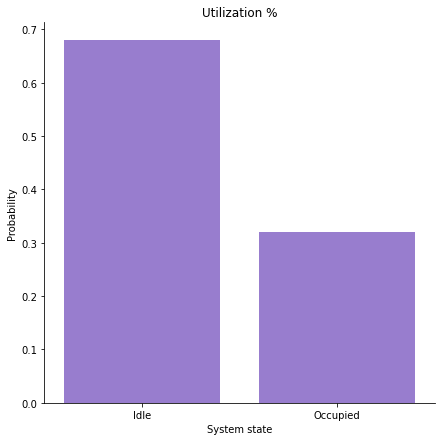

Output: 
 Servers: 4 
Time Between Arrivals :  1.003540208760709 
 Service Time: (1/µ) 0.7107006852820134 
 Utilization (c):  0.11818792007834482 
 Expected wait time in line (Wq): 0.0031792999999999995 
 Expected time spent on the system (Ws): 0.7138797 
 Expected number of customers in line (Lq): 0.00914740960904489 
 Expected number of clients in the system (Ls): 0.48189908992242414 
 


Text(0.5, 1.0, 'number of servers vs Utilization')

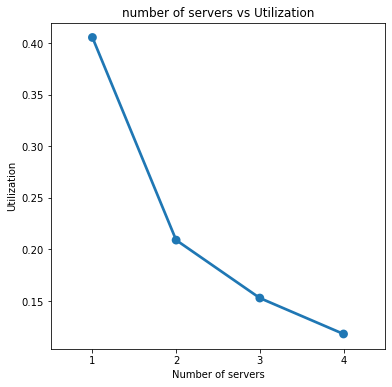

In [3]:
# generating inter arrival times using exponential distribution
while c < 5:
    if c == 1:
        inter_arrival_times = list(np.random.exponential(scale=1/l,size=ncust))
        
    arrival_times = [] # list of arrival times of a person joining the queue
    finish_times = [] # list of finish times after waiting and being served
    
    arrival_times = [0 for i in range(ncust)]
    finish_times = [0 for i in range(ncust)]
    
    arrival_times[0] = round(inter_arrival_times[0], 4) #arrival of first customer
    
    # Generate arrival times
    for i in range(1, ncust):
        arrival_times[i] = round((arrival_times[i-1] + inter_arrival_times[i]), 4)
    
    # Generate random service times for each customer 
    if c == 1:
        service_times = list(np.random.exponential(scale=1/µ, size=ncust))
    
    # Generating finish times
    finish_times[0]= round((arrival_times[0] + service_times[0]),4)
    for i in range(1,ncust):
        previous_finish=finish_times[:i]
        previous_finish.sort(reverse=True)
        previous_finish=previous_finish[:c]
        if i< c:
            finish_times[i] = round(arrival_times[i] + service_times[i],4)
        else:
            finish_times[i]=round((max(arrival_times[i],min(previous_finish)) + service_times[i]),4)  
    
    # Total time spent in the system by each customer
    total_times =[abs(round((finish_times[i] - arrival_times[i]), 4)) for i in range(ncust)]
    
    # Time spent waiting before being served (time spent in the queue)
    wait_times = [abs(round((total_times[i] - service_times[i]) ,4)) for i in range (ncust)]
    
    # creating a dataframe with all the data of the model
    df = pd.DataFrame(list(zip(arrival_times, finish_times, service_times, total_times, wait_times, inter_arrival_times)),
                 columns =['arrival_times', 'finish_times', 'service_times', 'total_times', 'wait_times', 'inter_arrival_times' ])
    
    # generating the timeline, and their description (arrivals, departures)
    tbe = list([0])
    timeline = ['simulation starts']
    for i in range(0, ncust):
        tbe.append(df['arrival_times'][i])
        tbe.append(df['finish_times'][i])
        timeline.append('customer ' +str(i+1)+ ' arrived')
        timeline.append('customer ' +str(i+1)+ ' left')
    
    # generating a dataframe with the timeline and description of events
    timeline = pd.DataFrame(list(zip(tbe, timeline)),
                        columns = ['time', 'Timeline']).sort_values(by = 'time').reset_index()
    timeline = timeline.drop(columns='index')
    
    # generating the number of customers inside the system at any given time of the simulation
    # and recording idle and working times
    timeline['n'] = 0
    x=0
    for i in range(1,(2*ncust)-1):
        if len((timeline.Timeline[i]).split()) > 2:
            z = str(timeline['Timeline'][i]).split()[2]
        else:
            continue
        if z == 'arrived':
            x = x + 1    # count
            timeline['n'][i] = x
        else:
            x = x-1      # do not count
            if x == -1:
                x = 0
                timeline['n'][i] = x
    
    # computing time between events
    t = list()
    for i in timeline.index:
        if i == (2*ncust) - 2:
            continue
        if i < 2*ncust:
            x = timeline.time[i+1]
        else:
            x = timeline.time[i]
        y = timeline.time[i]
        t.append(round((x-y), 4))

    t.append(0)
    timeline['tbe'] = t
    
    # computing the probability and time spent of 'n' customers in the system
    Pn = timeline.groupby('n').tbe.agg(sum)/sum(t)
    Tn = timeline.groupby('n').tbe.agg('count')
    
    
    #checking central tendency measures and dispersion of the data
    timeline.n.describe()
    
    
    # computing expected number of customers in the system
    Ls = (sum(Pn*Pn.index))
    
    # computing expected customers waiting in line
    Lq = sum((Pn.index[c+1:]-1)*(Pn[c+1:]))
    
    
    #plots
    
    # plotting Wait times
    plt.figure(figsize=(12,4))
    sns.lineplot(x=df.index, y=wait_times, color='blue').set(xticklabels=[])
    plt.xlabel('Customer number')
    plt.ylabel('Minutes')
    plt.title('Wait time of customers with '+str(c)+ ' servers')
    sns.despine()
    plt.show()
    
    if c == 1:
        #plotting data
        plt.figure(figsize=(7,7))
        sns.distplot(inter_arrival_times, kde=False, color='r', bins=20)
        plt.title('Time between Arrivals')
        plt.xlabel('Minutes')
        plt.ylabel('Frequency')
        sns.despine()
        plt.show()
        
        #service time distribution plot
        plt.figure(figsize=(8,8))
        sns.distplot(service_times, kde=False)
        plt.title('Service Times')
        plt.xlabel('Minutes')
        plt.ylabel('Frequency')
        sns.despine()
        plt.show()
        
    
    # plotting probability results
    plt.figure(figsize=(8,8))
    sns.barplot(x=Pn.index, y=Pn, color='g')
    plt.title('Probability of n customers in the system with '+str(c)+' servers')
    plt.xlabel('number of customers')
    plt.ylabel('Probability')
    sns.despine()
    plt.show()
    
    # utilization plot
    plt.figure(figsize=(7,7))
    sns.barplot(['Idle','Occupied'],[Pn[0],1-Pn[0]],color='mediumpurple')
    plt.title('Utilization %')
    plt.xlabel('System state')
    plt.ylabel('Probability')
    sns.despine()
    plt.show()
    
    utilization.setdefault(c, (Ls - Lq)/c)
    
    
    print('Output:','\n',
          'Servers: '+str(c), '\n'
          'Time Between Arrivals : ',str(df.inter_arrival_times.mean()),'\n',
          'Service Time: (1/µ)',str(df.service_times.mean()),'\n'
          ' Utilization (c): ',str((Ls-Lq)/c),'\n',
          'Expected wait time in line (Wq):',str(df['wait_times'].mean()),'\n',
          'Expected time spent on the system (Ws):',str(df.total_times.mean()),'\n',
          'Expected number of customers in line (Lq):',str(Lq),'\n',
          'Expected number of clients in the system (Ls):',str(Ls),'\n ')
    
    c = c+1  # increment server by one until 4

utilization = pd.Series(utilization)
plt.figure(figsize=(6,6))  
sns.pointplot(x=utilization.index,y=utilization)
plt.xlabel('Number of servers')
plt.ylabel('Utilization')
plt.title('number of servers vs Utilization')

